In [1]:
import pandas as pd

In [2]:
columns = [
    'mpg',
    'cylinders',
    'displacement',
    'horsepower',
    'weight',
    'acceleration',
    'model year',
    'origin',
    'car name'
]

auto_data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data',
                       names=columns, header=None,delim_whitespace=True)

auto_data

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.00,2790.0,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52.00,2130.0,24.6,82,2,vw pickup
395,32.0,4,135.0,84.00,2295.0,11.6,82,1,dodge rampage
396,28.0,4,120.0,79.00,2625.0,18.6,82,1,ford ranger


## Unique car names

In [3]:
len(auto_data['car name'].unique())

305

In [4]:
len(auto_data)

398

In [5]:
auto_data = auto_data.drop('car name', axis=1)
auto_data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1


### Replace Orgin with names

In [6]:
auto_data['origin'] = auto_data['origin'].replace({1:'america',
                                                   2:'europe',
                                                   3:'asia'})

auto_data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,america
1,15.0,8,350.0,165.0,3693.0,11.5,70,america
2,18.0,8,318.0,150.0,3436.0,11.0,70,america
3,16.0,8,304.0,150.0,3433.0,12.0,70,america
4,17.0,8,302.0,140.0,3449.0,10.5,70,america


### Change Origin to one hot encoding

In [7]:
auto_data = pd.get_dummies(auto_data,columns=['origin'])
auto_data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin_america,origin_asia,origin_europe
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,0,0
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,0,0
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,0,0
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,0,0
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,0,0


### Replace ? with nan

In [8]:
import numpy as np

auto_data = auto_data.replace('?',np.nan)

In [9]:
auto_data = auto_data.dropna()

In [10]:
len(auto_data)

392

# Training

In [11]:
from sklearn.model_selection import train_test_split

X = auto_data.drop('mpg', axis = 1)
Y = auto_data['mpg']

X_train, x_test, Y_train, y_test = train_test_split(X,Y,test_size=.2,random_state=0)

In [12]:
from sklearn.svm import SVR

# Change C to adjust penalty
regression_model = SVR(kernel='linear',C=1.0)
regression_model.fit(X_train,Y_train)

SVR(kernel='linear')

In [13]:
regression_model.coef_

array([[-0.65131731,  0.10313732, -0.16190965, -0.00896875,  0.4332911 ,
         0.85408954, -1.85266565,  0.70061963,  1.15204602]])

In [14]:
regression_model.score(X_train,Y_train)

0.6193757170869002

<AxesSubplot:title={'center':'Modal Coefficients'}>

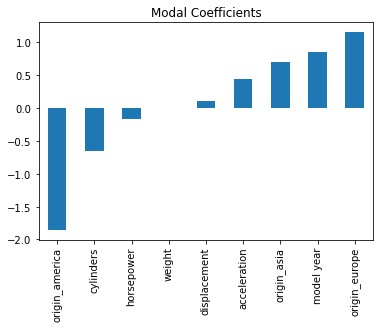

In [15]:
from pandas  import Series
import matplotlib.pyplot as plt

%matplotlib inline

predictors = X_train.columns
coef = Series(regression_model.coef_[0],predictors).sort_values()
coef.plot(kind='bar', title='Modal Coefficients')

In [16]:
y_predict = regression_model.predict(x_test) 

Populating the interactive namespace from numpy and matplotlib


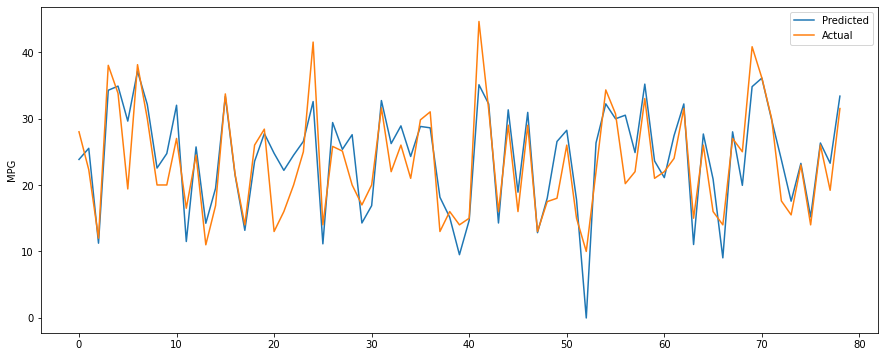

In [17]:
%pylab inline
pylab.rcParams['figure.figsize'] = (15,6)

plt.plot(y_predict,label='Predicted')
plt.plot(y_test.values,label='Actual')
plt.ylabel('MPG')

plt.legend()
plt.show()

In [18]:
regression_model.score(x_test,y_test)

0.7189384368816836

In [19]:
from sklearn.metrics import mean_squared_error
regression_model_mse = mean_squared_error(y_predict,y_test)
regression_model_mse

17.469469948804594

In [20]:
import math

math.sqrt(regression_model_mse)

4.179649500712302